# Ejercicio 1

## a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar las imágenes y convertirlas a escala de grises y float
img1 = np.array(Image.open('imagenes/img_01.jpg').convert('L')).astype(float)
img2 = np.array(Image.open('imagenes/img_02.jpg').convert('L')).astype(float)

# Función para extraer pares verticales de píxeles
def extraer_pares_verticales(imagen):
    height, width = imagen.shape
    pares = []
    for i in range(height - 1):
        for j in range(width):
            pixel_superior = imagen[i, j]
            pixel_inferior = imagen[i + 1, j]
            pares.append([pixel_superior, pixel_inferior])
    return np.array(pares)

# Extraer pares para ambas imágenes
pares_img1 = extraer_pares_verticales(img1)
pares_img2 = extraer_pares_verticales(img2)


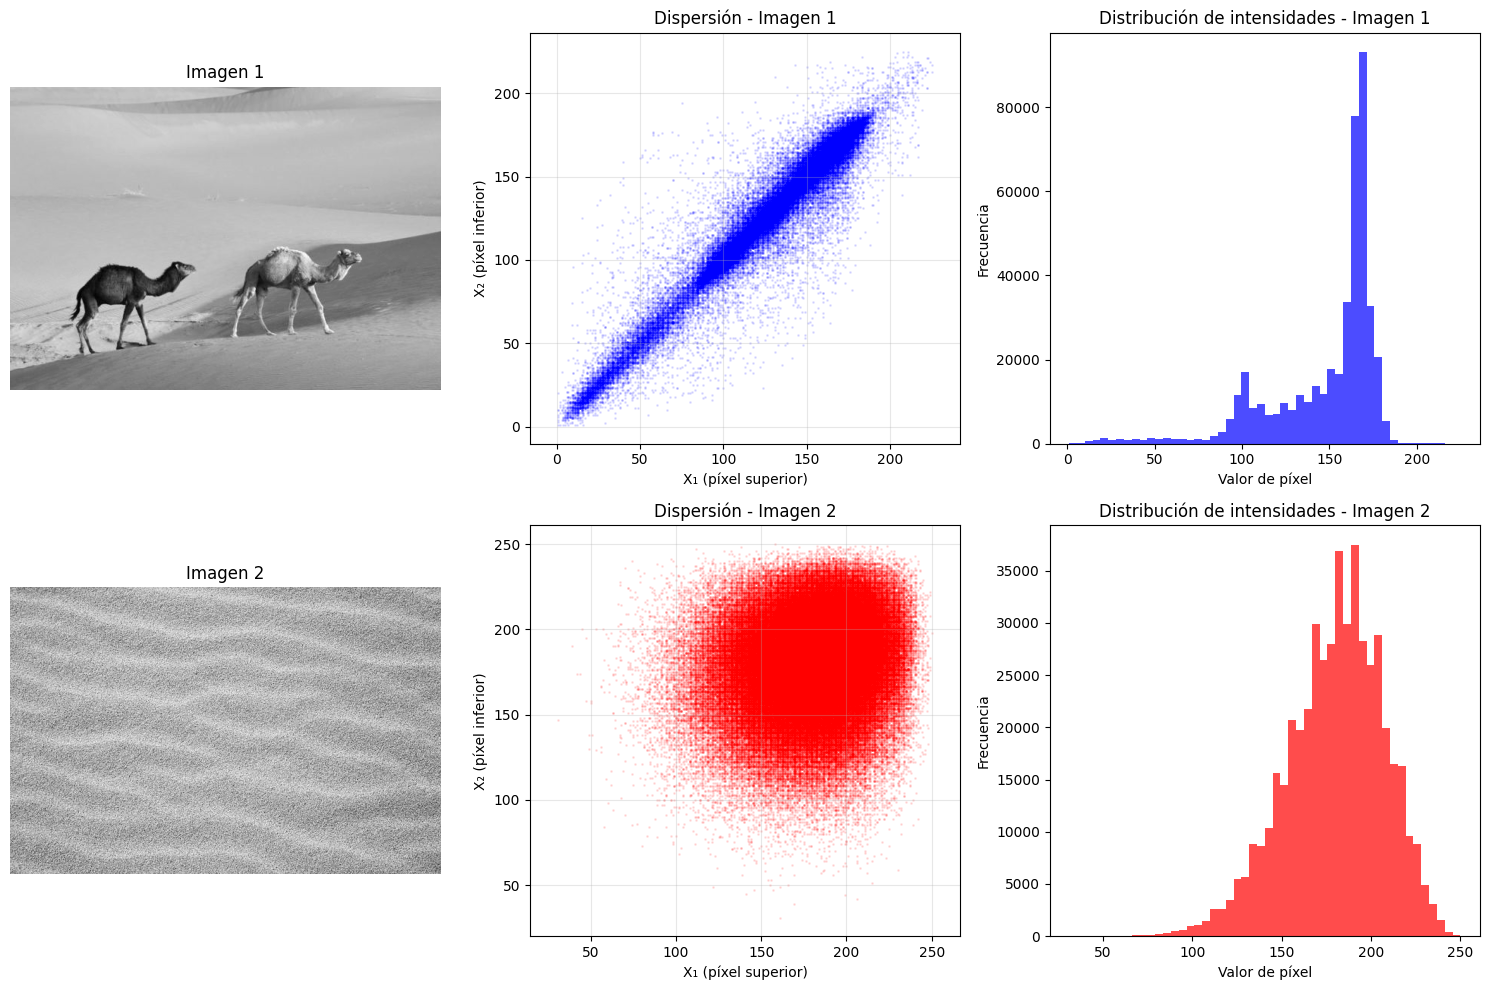

Dimensiones Imagen 1: (400, 568)
Dimensiones Imagen 2: (408, 612)
Número de pares verticales Imagen 1: 226632
Número de pares verticales Imagen 2: 249084
Rango de valores Imagen 1: [1.0, 225.0]
Rango de valores Imagen 2: [31.0, 250.0]


In [2]:
# Crear la figura con subplots
plt.figure(figsize=(15, 10))

# Mostrar imagen 1
plt.subplot(2, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1')
plt.axis('off')

# Scatter plot para imagen 1
plt.subplot(2, 3, 2)
plt.scatter(pares_img1[:, 0], pares_img1[:, 1], alpha=0.1, s=1, color='blue')
plt.title('Dispersión - Imagen 1')
plt.xlabel('X₁ (píxel superior)')
plt.ylabel('X₂ (píxel inferior)')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Histograma marginal para imagen 1
plt.subplot(2, 3, 3)
plt.hist(pares_img1.flatten(), bins=50, alpha=0.7, color='blue')
plt.title('Distribución de intensidades - Imagen 1')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

# Mostrar imagen 2
plt.subplot(2, 3, 4)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2')
plt.axis('off')

# Scatter plot para imagen 2
plt.subplot(2, 3, 5)
plt.scatter(pares_img2[:, 0], pares_img2[:, 1], alpha=0.1, s=1, color='red')
plt.title('Dispersión - Imagen 2')
plt.xlabel('X₁ (píxel superior)')
plt.ylabel('X₂ (píxel inferior)')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Histograma marginal para imagen 2
plt.subplot(2, 3, 6)
plt.hist(pares_img2.flatten(), bins=50, alpha=0.7, color='red')
plt.title('Distribución de intensidades - Imagen 2')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Información adicional útil
print(f"Dimensiones Imagen 1: {img1.shape}")
print(f"Dimensiones Imagen 2: {img2.shape}")
print(f"Número de pares verticales Imagen 1: {len(pares_img1)}")
print(f"Número de pares verticales Imagen 2: {len(pares_img2)}")
print(f"Rango de valores Imagen 1: [{img1.min():.1f}, {img1.max():.1f}]")
print(f"Rango de valores Imagen 2: [{img2.min():.1f}, {img2.max():.1f}]")

## b

In [6]:
# Calcular correlación para cada imagen
def correlacion(pares):
    X1 = pares[:,0] # Extraer primera columna -> píxel de arriba
    X2 = pares[:,1] # Extraer segunda columna -> píxel de abajo
    return np.corrcoef(X1, X2)[0,1] # Armar la matriz de correlación 2x2 y agarrar la correlación entre X1 y X2

corr_img1 = correlacion(pares_img1)
corr_img2 = correlacion(pares_img2)

print(f"Coeficiente de correlación Imagen 1: {corr_img1:.4f}")
print(f"Coeficiente de correlación Imagen 2: {corr_img2:.4f}")

Coeficiente de correlación Imagen 1: 0.9790
Coeficiente de correlación Imagen 2: 0.1467


En la Imagen 1 obtuvimos un coeficiente de correlación cercano a uno, lo que muestra una fuerte relación lineal entre píxeles vecinos. En cambio, para la Imagen 2 el coeficiente fue más bajo, mostrando menor redundancia.
Esto nos dice que la Imagen 1 puede comprimirse con PCA manteniendo mayor calidad, ya que los píxeles contienen información más repetitiva.